**Motivation :** We bought a house on loan in 2019. So When i went to the bank for the loan approval, He was asking me for the information like how many propery do we have, The loan amount, Salary and many more. So I was curious how these things actually happened in backend. So I started this project.

## **Problem Statement**


Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates?

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

In [ ]:
data=pd.read_csv("/content/train_fNxu4vz.csv")
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


So I started this project with the effort to understand each feature seprately to know how does it actually affect our output. 

One can simply say that the rate of Interest is directly proportional to the amount of risk involved . In simple terms, as risk increases, bank also increases their interest rate

So I made few hypothesis before analyzing the data by using the prior knowledge which i have in terms of finance.

**My hypothesis** :

1. Loan ID - Just a unique arbitary number alloted to each transaction.

2. Loan_Amount_Requested ---> More amount more risk, Higher the interest rate.

3. Length_Employed  ---> less length more risk, Higher the interest rate.

4. Home owner ---> Own house less interest, rent house more interest.

5. Annual_Income ----> More Income, less risk , less rate.

6. Income_Verified ---> If Verified less risk, less rate.

7. Purpose_Of_Loan  --> Monetize loan has higher rate as compared to home loan (These are basically policities create by bank and government)

8. Debt_To_Income (Amount spend/gross income)  ----> Less ratio, less risk , less rate.

9. Inquiries_Last_6Mo ---> creating inquiries indicates increased risk

10. Months_Since_Deliquency  ---> More the time away from criminal act, less the rate

11. Number_Open_Accounts ----> Opening too many accounts indicates increased risk

12. Total_Accounts ---> More number of total accounts,  It generally shows that other lenders have trusted you with credit that means less risk.

13. Gender  --> Depend upon the policy.



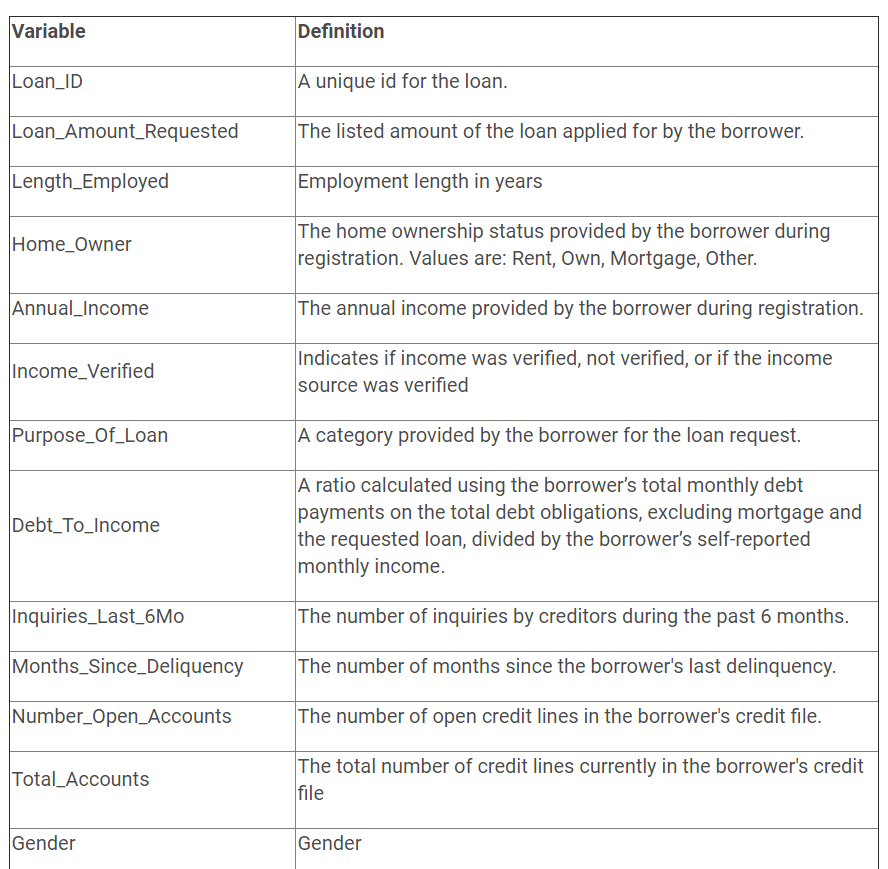

# **Data Preprocessing**

In [ ]:
data.shape

(164309, 14)

In [ ]:
data.corr().loc["Interest_Rate",:]

Loan_ID                    0.001290
Annual_Income             -0.052783
Debt_To_Income             0.152472
Inquiries_Last_6Mo         0.188987
Months_Since_Deliquency   -0.042108
Number_Open_Accounts       0.002847
Total_Accounts            -0.040690
Interest_Rate              1.000000
Name: Interest_Rate, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [ ]:
(data.isnull().sum()/data.shape[0])*100

Loan_ID                     0.000000
Loan_Amount_Requested       0.000000
Length_Employed             4.486060
Home_Owner                 15.427639
Annual_Income              15.277313
Income_Verified             0.000000
Purpose_Of_Loan             0.000000
Debt_To_Income              0.000000
Inquiries_Last_6Mo          0.000000
Months_Since_Deliquency    53.788289
Number_Open_Accounts        0.000000
Total_Accounts              0.000000
Gender                      0.000000
Interest_Rate               0.000000
dtype: float64

In [ ]:
(data.isnull().sum()/data.shape[0])*100

**Planning to remove Months_Since_Deliquency since it has 50% null value**

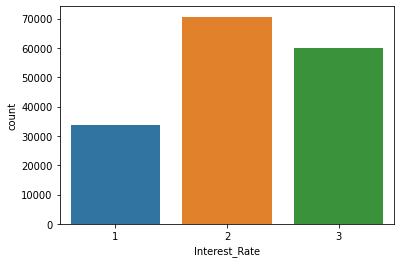

In [ ]:
sns.countplot(data['Interest_Rate'])
# It's an Balanced dataset

0.46089962944440055
-0.7363474524876565


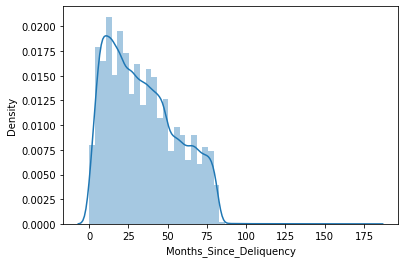

In [ ]:
print(data['Months_Since_Deliquency'].skew())
print(data['Months_Since_Deliquency'].kurtosis())
sns.distplot(data['Months_Since_Deliquency'])

### **kurtosis**

Baseline: Kurtosis value of 0

Data that follow a normal distribution perfectly have a kurtosis value of 0. Normally distributed data establishes the baseline for kurtosis. Sample kurtosis that significantly deviates from 0 may indicate that the data are not normally distributed.

Positive kurtosis:

A distribution with a positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. For example, data that follow a t distribution have a positive kurtosis value.

Negative kurtosis:

A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution. For example, data that follow a beta distribution with first and second shape parameters equal to 2 have a negative kurtosis value.

A negative kurtosis means that your distribution is flatter than a normal curve with the same mean and standard deviation.

So, when is the skewness too much?

The rule of thumb seems to be:

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.

If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

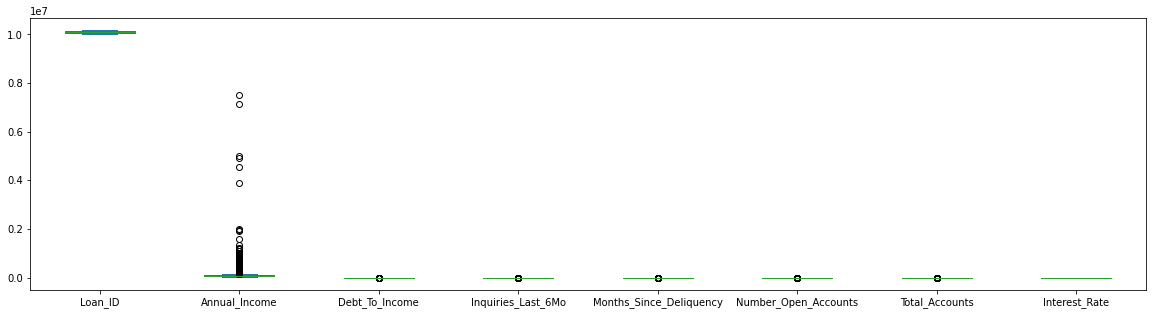

In [ ]:
data.plot(kind = 'box',figsize=(20,5))

**Annual Income feature has most number of outliers**

# **Handling missing values**

In [ ]:
data["Length_Employed"].fillna(data['Length_Employed'].mode()[0],inplace = True)

In [ ]:
data["Home_Owner"].fillna(data['Home_Owner'].mode()[0],inplace = True)

In [ ]:
data["Annual_Income"].fillna(data['Annual_Income'].median(),inplace = True)

In [ ]:
data=data.drop(["Months_Since_Deliquency"],axis=1)

In [ ]:
data.isna().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  object 
 2   Length_Employed        164309 non-null  object 
 3   Home_Owner             164309 non-null  object 
 4   Annual_Income          164309 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  int64  
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 16.3+ MB


# **EDA and Data cleaning of Each column seprately** 

**Length Employed**

In [ ]:
data["Length_Employed"].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', '6 years', '9 years', '3 years', '5 years'],
      dtype=object)

In [ ]:
Length_Employed={'< 1 year':0, '4 years':4, '7 years':7, '8 years':8, '2 years':2,'10+ years':10, '1 year':1, '6 years':6, '9 years':9, '3 years':3, '5 years':5}

In [ ]:
data["Length_Employed"]=data["Length_Employed"].map(Length_Employed)

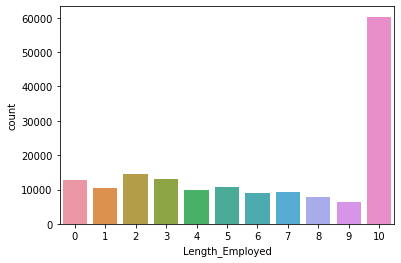

In [ ]:
sns.countplot(data['Length_Employed'])

**Loan_Amount_Requested**

In [ ]:
data["Loan_Amount_Requested"].unique()

array(['7,000', '30,000', '24,725', ..., '28,950', '33,325', '29,825'],
      dtype=object)

In [ ]:
data["Loan_Amount_Requested"]=data['Loan_Amount_Requested'].str.replace(',', '').astype(int)

0.7272164488493352
-0.14116508515729098


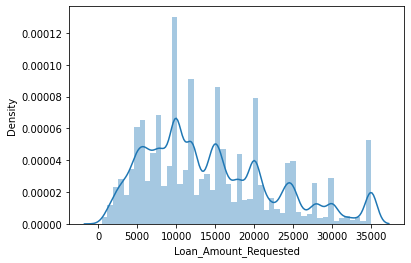

In [ ]:
print(data['Loan_Amount_Requested'].skew())
print(data['Loan_Amount_Requested'].kurtosis())
sns.distplot(data['Loan_Amount_Requested'])

Postively skewed

Do not follow a normal distribution curve

has less outlier as kurtosis is negative and no tail

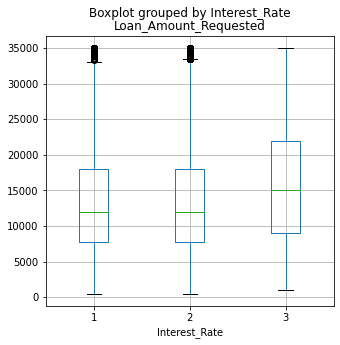

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.suptitle('')
data.boxplot(column=['Loan_Amount_Requested'], by='Interest_Rate', ax=ax)

In [ ]:
print(data['Loan_Amount_Requested'].corr(data['Interest_Rate']))
print(data['Loan_label'].corr(data['Interest_Rate']))

0.13248578011541345
0.12672622524950958


**Annual Income**

43.494219236470244
4664.030277149857


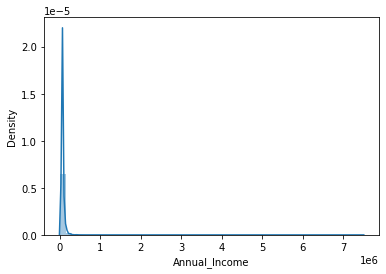

In [ ]:
print(data['Annual_Income'].skew())
print(data['Annual_Income'].kurtosis())
sns.distplot(data['Annual_Income'])

**Home_Owner**

In [ ]:
data["Home_Owner"].unique()

array(['Rent', 'Mortgage', 'Own', 'Other', 'None'], dtype=object)

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['Home_Owner']= label_encoder.fit_transform(data['Home_Owner'])

In [ ]:
data['Home_Owner'].value_counts()

0    95694
4    56031
3    12525
2       49
1       10
Name: Home_Owner, dtype: int64

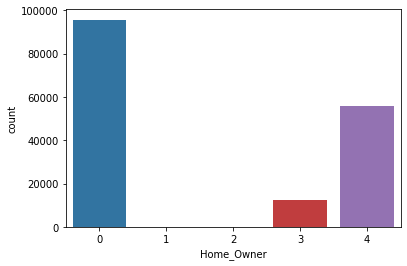

In [ ]:
sns.countplot(data['Home_Owner'])

**Income_Verified**

In [ ]:
data["Income_Verified"].unique()

array(['not verified', 'VERIFIED - income', 'VERIFIED - income source'],
      dtype=object)

In [ ]:
data["Income_Verified"].value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [ ]:
Income_Verified={'not verified':0, 'VERIFIED - income':1, 'VERIFIED - income source':2}

In [ ]:
data["Income_Verified"]=data["Income_Verified"].map(Income_Verified)

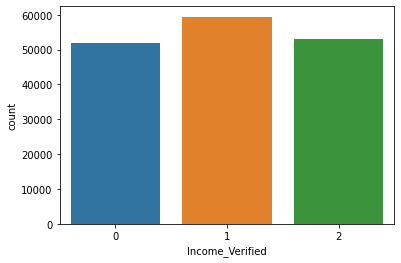

In [ ]:
sns.countplot(data['Income_Verified'])

**Purpose_Of_Loan**

In [ ]:
data["Purpose_Of_Loan"].unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['Purpose_Of_Loan']= label_encoder.fit_transform(data['Purpose_Of_Loan'])

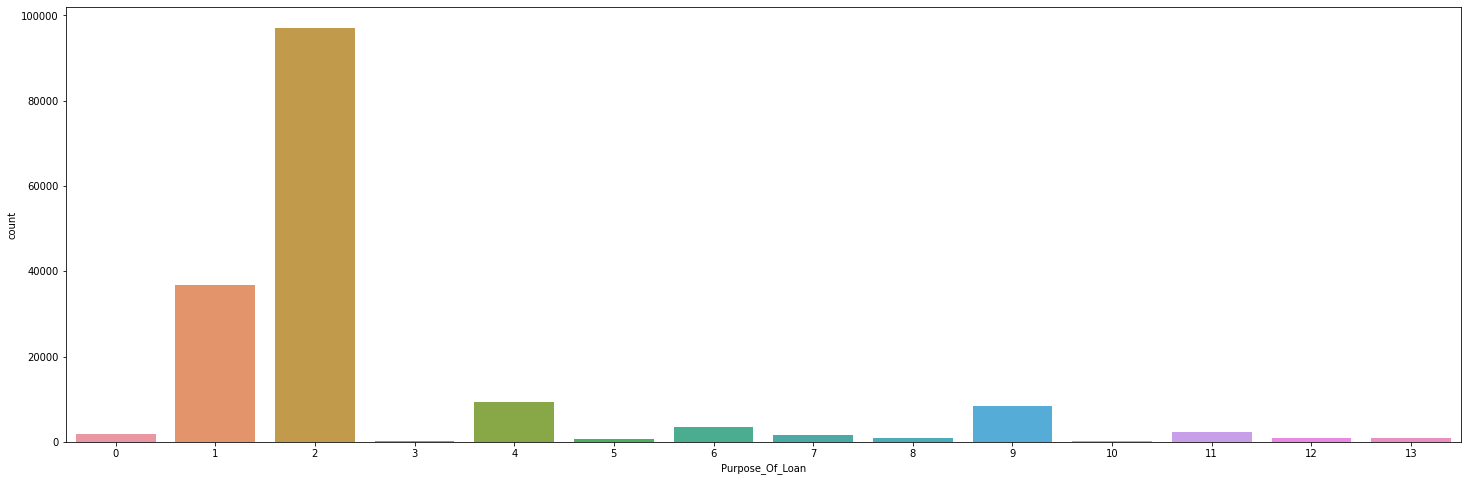

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(data['Purpose_Of_Loan'])

**Gender**

In [ ]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
gender={'Female':1, 'Male':0}

In [ ]:
data["Gender"]=data["Gender"].map(gender)

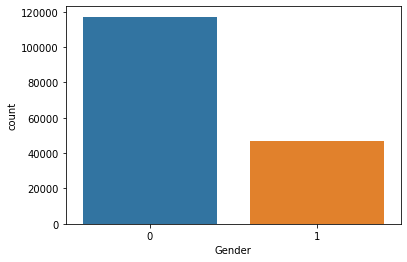

In [ ]:
sns.countplot(data['Gender'])

**Debt to income**

0.19220424443627823
-0.5346745798493684


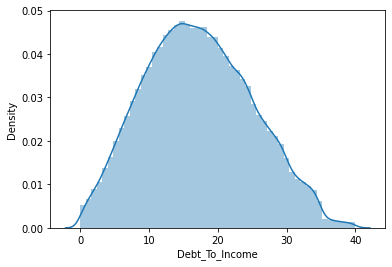

In [ ]:
print(data['Debt_To_Income'].skew())
print(data['Debt_To_Income'].kurtosis())
sns.distplot(data.Debt_To_Income)

**Inquiries_Last_6Mo**

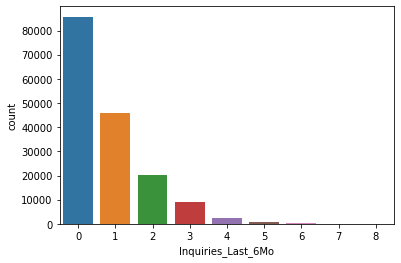

In [ ]:
sns.countplot(data['Inquiries_Last_6Mo'])

**Number_Open_Accounts**

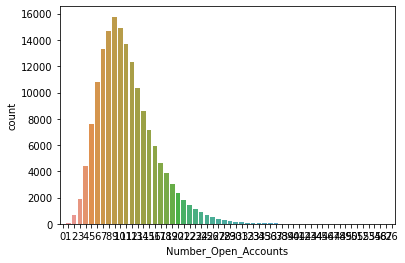

In [ ]:
sns.countplot(data['Number_Open_Accounts'])

**Total_Accounts**

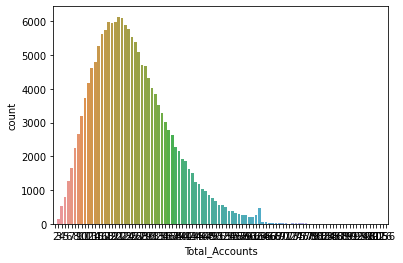

In [ ]:
sns.countplot(data['Total_Accounts'])

# **Creating new features**

In [ ]:
data["Number_Invalid_Acc"] = data["Total_Accounts"] - data["Number_Open_Accounts"]
data["Number_Years_To_Repay_Debt"] = data["Loan_Amount_Requested"]/data["Annual_Income"]

In [ ]:
# Creating a new label to categorize the loan amount
data['Loan_label'] = pd.cut(x=data['Loan_Amount_Requested'], bins= 3, labels=[0,1,2], right=True)

In [ ]:
data['Income_label'] = pd.cut(x=data['Annual_Income'], bins= 3, labels=[0,1,2], right=True)

In [ ]:
data

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_label,Income_label,Number_Invalid_Acc,Number_Years_To_Repay_Debt
0,10000001,7000,0,4,68000.0,0,0,18.37,0,9,14,1,1,0,0,5,0.102941
1,10000002,30000,4,0,63000.0,1,2,14.93,0,12,24,1,3,2,0,12,0.476190
2,10000003,24725,7,0,75566.4,2,2,15.88,0,12,16,0,3,2,0,4,0.327196
3,10000004,16000,0,0,56160.0,2,2,14.34,3,16,22,0,3,1,0,6,0.284900
4,10000005,17000,8,3,96000.0,2,2,22.17,1,19,30,1,1,1,0,11,0.177083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725,10,4,63000.0,2,1,13.56,0,13,16,0,2,1,0,3,0.328968
164305,10164306,6000,8,3,63000.0,2,11,9.12,0,13,30,0,2,0,0,17,0.095238
164306,10164307,20250,10,0,63000.0,1,1,18.17,1,17,30,0,1,1,0,13,0.321429
164307,10164308,10000,4,4,63000.0,0,6,18.75,1,16,62,1,3,0,0,46,0.158730


In [ ]:
data2=data.drop(["Total_Accounts","Number_Open_Accounts","Loan_Amount_Requested","Annual_Income"],axis=1)

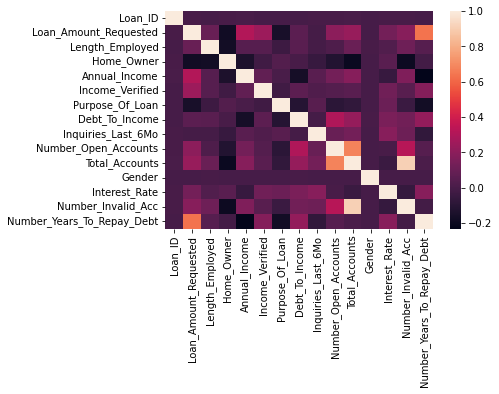

In [ ]:
sns.heatmap(data.corr())

In [ ]:
trains = data[data['Interest_Rate'].isna() == False] 
tests = data[data['Interest_Rate'].isna() == True]

# **Insights from Data**

In [ ]:
trains.groupby('Length_Employed')['Loan_Amount_Requested'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Length_Employed,,,,,,
0,12805,500,35000,13073.049590,11200.0,8065.617881
1,10422,725,35000,13242.355114,11500.0,7980.595155
2,14620,800,35000,13592.093023,12000.0,8067.727029
3,12974,500,35000,13699.460459,12000.0,8011.624766
4,9784,900,35000,13733.130621,12000.0,7972.669287
5,10814,1000,35000,13850.906233,12000.0,8043.100489
6,9094,1000,35000,14103.216406,12000.0,8004.244626
7,9308,1000,35000,14439.637946,12762.5,8068.943753
8,7917,1000,35000,14517.361374,12975.0,8135.982141


1. Average Loan Amount Requested is maximum for people with 10+ years of experience.
2. Mean Loan_Amount_Requested is minimum for people with <1 year of being employed.

In [ ]:
trains.groupby('Home_Owner')['Loan_Amount_Requested'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Home_Owner,,,,,,
0,95694,500,35000,15569.770832,14500.0,8555.801557
1,10,2800,15000,9420.000000,10375.0,3766.533921
2,49,1000,35000,10642.857143,10000.0,6569.131570
3,12525,900,35000,13567.704591,12000.0,8135.510763
4,56031,500,35000,12443.831986,10625.0,7413.272921


Average Loan_Amount_Requested is maximum for people with Home_Owner status as Mortgage 

In [ ]:
trains.groupby('Purpose_Of_Loan')['Loan_Amount_Requested'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Purpose_Of_Loan,,,,,,
0,1885,1000,35000,8053.806366,6000.0,5608.118313
1,36684,725,35000,14754.313870,13000.0,7999.013687
2,97101,800,35000,15148.553568,14000.0,8164.935576
3,121,1000,25000,7110.123967,6000.0,4871.189300
4,9269,900,35000,13867.466825,12000.0,8834.936431
5,773,1000,35000,15042.205692,13475.0,8731.603527
6,3435,1000,35000,10394.657933,8000.0,7929.416404
7,1541,1000,35000,8913.854640,6850.0,6923.468955
8,974,1000,35000,7668.814168,5375.0,6418.661738


1. Average loan amount requested is highest for small business followed by debt_consolidation.
2. Average income requested is also high for House loans.

In [ ]:
trains.groupby('Interest_Rate')['Loan_Amount_Requested'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Interest_Rate,,,,,,
1,33806,500,35000,13351.443531,12000.0,7307.255920
2,70580,500,35000,13419.251913,12000.0,7759.823178
3,59923,1000,35000,16007.801679,15000.0,9093.711445


Average Loan Amount seems to be high for Interest Rate category 3 and there is not much between the loan amount for categories 1 and 2.

In [ ]:
trains.groupby('Interest_Rate')['Annual_Income'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Interest_Rate,,,,,,
1,33806,5000.0,4900000.0,78503.289623,63000.0,56552.869715
2,70580,4000.0,7141778.0,69936.895009,63000.0,54506.035531
3,59923,4800.0,7500000.0,70083.414592,63000.0,56309.359278


The mean Annual_Income for Interest Rate Category 1 is the highest. And it is almost the same for Interest Rate categories 2 and 3.

# **Model Building**

In [ ]:
trains.shape

(164309, 17)

In [ ]:
trains.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Interest_Rate', 'Loan_label', 'Income_label',
       'Number_Invalid_Acc', 'Number_Years_To_Repay_Debt'],
      dtype='object')

In [ ]:
x=trains.drop(["Loan_ID","Interest_Rate"],axis=1).values
x2=data2.drop(["Loan_ID","Interest_Rate"],axis=1).values

In [ ]:
y=trains["Interest_Rate"].values
y2=data2["Interest_Rate"].values

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,log_loss,f1_score

In [ ]:
from sklearn.preprocessing import StandardScaler # Preprocessing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=3)

**random forest**

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
confusion_matrix(rf.predict(X_test),y_test)

array([[ 2367,  2304,   716],
       [ 6809, 14059,  8114],
       [ 1936,  6962, 10955]])

In [ ]:
accuracy_score(rf.predict(X_test),y_test)

0.6049795286046254

In [ ]:
rf2=RandomForestClassifier()
rf2.fit(X2_train,y2_train)
confusion_matrix(rf2.predict(X2_test),y2_test)

array([[ 2505,  2770,   989],
       [ 6444, 13401,  8002],
       [ 2163,  7154, 10794]])

In [ ]:
accuracy_score(rf2.predict(X2_test),y2_test)

0.592420050901848

**xgboost**

In [ ]:
xgb=XGBClassifier()
xgb.fit(X2_train,y2_train)
accuracy_score(xgb.predict(X2_test),y2_test)

0.618534912028328

In [ ]:
# kfold = KFold(n_splits=7)
# cv_results = cross_val_score(rf, X_train, y_train, cv= kfold,scoring="balanced_accuracy", n_jobs=-1)   

In [ ]:
# cv_results.mean()